<H1>Visualisation des données</H1>

Il existe différentes librairies qui permettent de visualiser les données contenues dans un dataframe. Par exemple Matplotlib ou Seaborn.


## Utilisation de Matplotlib

Il faut tout d'abord importer la librairie maplotlib

In [9]:
import matplotlib.pyplot as plt

La librairie permet via la commande plot d'afficher différentes visualization. 

df.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)

Parmi les principales :  
*kind* permet de spécifier le type de visualisation avec les valeurs dans :  
    ‘line’ : line plot (default)  
    ‘bar’ : vertical bar plot  
    ‘barh’ : horizontal bar plot  
    ‘hist’ : histogram  
    ‘box’ : boxplot  
    ‘kde’ : Kernel Density Estimation plot  
    ‘density’ : same as ‘kde’  
    ‘area’ : area plot  
    ‘pie’ : pie plot  
    ‘scatter’ : scatter plot  
    ‘hexbin’ : hexbin plot  

*subplot* permet de spécifier qu'il s'agit d'une figure imbriquée dans une figure  
*figsize* pour spécifier la taille de la figure via un tuple (width, height) en inches  
*title* pour mettre un titre à la figure

Se reporter à la documentation officielle pour connaître la liste de toutes les options : 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

Quelques exemples à l'aide de la base IRIS

In [8]:
import pandas as pd 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 'Species']

df = pd.read_csv(url, names=names)
# 5 premières lignes du fichier
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Affichage pour un attribut 


Dans cette partie nous considérons chaque attribut indépendamment.  

** Affichage des valeurs **  
Pour avoir une première idée des données manipulées

NameError: name 'plt' is not defined

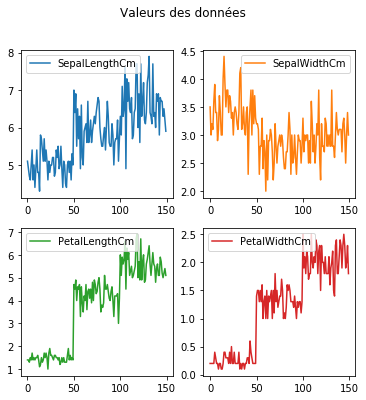

In [7]:
#Affichage des différentes valeurs 
# remarque : ici nous considérons uniquement les valeurs numériques
# kind = 'line' pour avoir des histogrammes
# subplots= True pour afficher les différentes vues dans une seule figure
# layout = (4,4) permet d'afficher les 4 figures sur la même ligne. 
# Par exemple layout=(2,2) affiche 2 figures sur une même ligne
# figzize = (6,6) indique la taille en inch. 
# Attention en fonction du layout la taille ne sera pas prise en compte pour 
# pouvoir insérer toutes les figures sur une ligne (layout = (4,4))
# sharex=False pour indiquer de mettre l'axe des x à chaque figure
# title='Valeurs des données' pour donner un titre à la figure
df.plot(kind='line', subplots=True, 
        layout=(2,2), figsize=(6,6),
        sharex=False, title='Valeurs des données')
plt.show()

**Histogramme**  
Les histogrammes permettent de se faire une première idée de la distribution des données. 

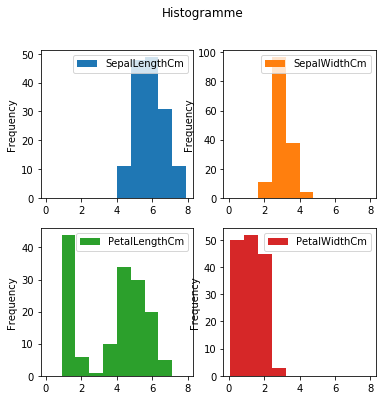

In [10]:
# Affichage des histogrammes des différentes valeurs 
# kind = 'hist' pour avoir des histogrammes
# subplots= True pour afficher les différentes vues dans une seule figure
# layout = (4,4) permet d'afficher les 4 figures sur la même ligne. 
# Par exemple layout=(2,2) affiche 2 figures sur une même ligne
# figzize = (6,6) indique la taille en inch. 
# Attention en fonction du layout la taille ne sera pas prise en compte pour 
# pouvoir insérer toutes les figures sur une ligne (layout = (4,4))
# sharex=False pour indiquer de mettre l'axe des x à chaque figure
# title='Histogramme' pour donner un titre à la figure
df.plot(kind='hist', subplots=True, 
        layout=(2,2), figsize=(6,6),
        sharex=False, title='Histogramme')
plt.show()

** Affichage des densités**  
Pour avoir une vue de la densité sous la forme de courbes.

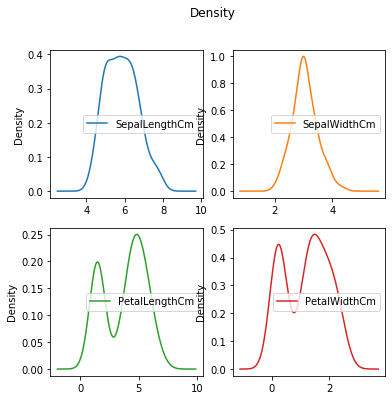

In [11]:

df.plot(kind='density', 
        subplots=True, layout=(2,2), 
        figsize=(6,6),sharex=False, title='Density')
plt.show()

** Affichage des boîtes à moustache **  
Les boîtes à moustache (boxplot) permettent d'avoir plus d'information sur la distribution de chaque attribut et notamment les outliers. Une boîte à moustache est un graphique simple composé d’un rectangle duquel deux droites sortent afin de représenter certains éléments des données :  
La valeur centrale du graphique est la médiane (il existe autant de valeur supérieures qu’inférieures à cette valeur dans l’échantillon).  
Les bords du rectangle sont les quartiles (Pour le bord inférieur, un quart des observations ont des valeurs plus petites et trois quart ont des valeurs plus grandes, le bord supérieur suit le même raisonnement).  
Les extrémités des moustaches sont calculées en utilisant 1.5 fois l’espace interquartile (la distance entre le 1er et le 3ème quartile).  

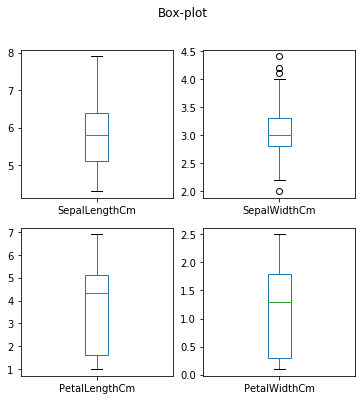

In [12]:
df.plot(kind='box', subplots=True, 
        layout=(2,2), figsize=(6,6),
        sharex=False, title='Box-plot')
plt.show()

**Diagramme circulaire**  
Les diagrammes circulaires (pie chart) permettent de connaître une répartition de valeurs.

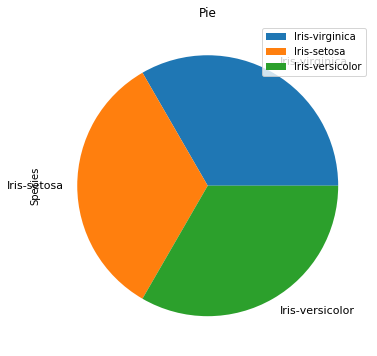

In [17]:
# Species n'est pas une valeur numérique, ici on compte combien de valeurs (value.count)
# fontsize pour changer la taille de la font
# legend=True pour afficher la légende
df['Species'].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)
plt.show()

### Travailler avec plusieurs attributs

**Correlations et carte de chaleur**  
Il est possible via la fonction correlation de déterminer les corrélations qui existent entre les différents attributs. Les cartes de chaleur (heatmap) peuvent être utilisées pour mettre en évidence ces corrélations.


               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


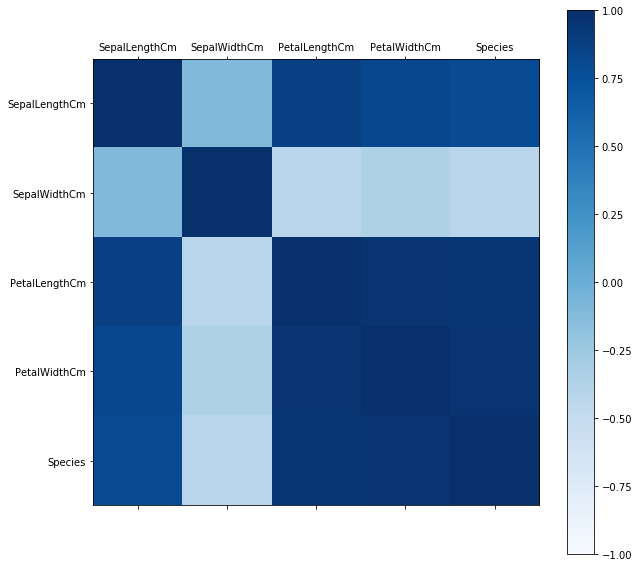

In [19]:
import numpy


correlations = df.corr()
# Affichage des valeurs de corrélation
print (correlations)

# Transformation des données de Species en données catégorielles
# pour pouvoir calculer aussi les corrélations avec les autres
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=df['Species']
le.fit(y)
df['Species'] = le.transform(y)


# Affichage de la matrice de corrélation
fig = plt.figure(figsize=(10,10))
# Partie à droite pour montrer les variations de valeurs
ax = fig.add_subplot(111)
# Détermine les valeurs maximales et minimales à afficher et le thème Blues
cax = ax.matshow(correlations, vmin=-1, 
                 vmax=1, 
                 cmap=plt.cm.Blues)
# Récupération des couleurs en fonctions des valeurs 
fig.colorbar(cax)
# Le tableau principal 
# debute à 0, taille 5 (5 valeurs à afficher), largeur d'une colonne 1
ticks = numpy.arange(0,5,1)
# mise en place 
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
# La diagonale est forcément la plus foncée

**Nuages de points**  
Ce nuage affiche les valeurs de deux variables. Elle est particulièrement utile pour savoir si deux valeurs sont fortement corrélés (ou inversement corrélées). Celles qui sont fortement corrélées peuvent être sans doute supprimées du jeu de données.  


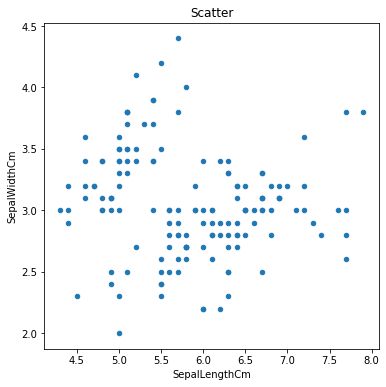

Text(0.5, 1.0, 'Scatter')

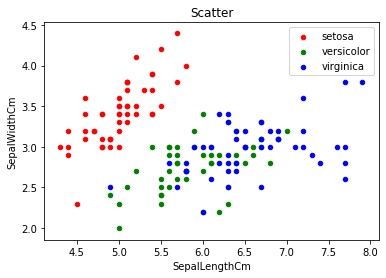

In [20]:
#df.plot(kind='scatter', subplots=True, layout=(2,2), figsize=(6,6),sharex=False, title='Valeurs des données')
# Pour deux attributs il faut préciser le x et le y
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

df = pd.read_csv(url, names=names)
df.plot(kind='scatter', x='SepalLengthCm', 
        y='SepalWidthCm',figsize=(6,6),
        sharex=False, title='Scatter')
plt.show()

# Pour mettre en avant les différentes espèces
ax=df[df.Species=='Iris-setosa'].plot(kind='scatter', 
                                    x='SepalLengthCm', 
                                    y='SepalWidthCm', 
                                    color='red', 
                                    label='setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter', 
                                    x='SepalLengthCm', 
                                    y='SepalWidthCm', 
                                    color='green', 
                                    label='versicolor', 
                                    ax=ax)
df[df.Species=='Iris-virginica'].plot(kind='scatter', 
                                      x='SepalLengthCm', 
                                      y='SepalWidthCm', 
                                      color='blue', 
                                      label='virginica', 
                                      ax=ax)
ax.set_title("Scatter")


**Scatter plot matrix**    
Cette matrice affiche toutes les valeurs en croisant les variables deux à deux. 

Dans pandas il est possible d'utiliser la fonction scatter_matrix (voir https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html) qui offre toutes les fonctionnalités pour afficher le contenu de toutes les valeurs de la matrice.

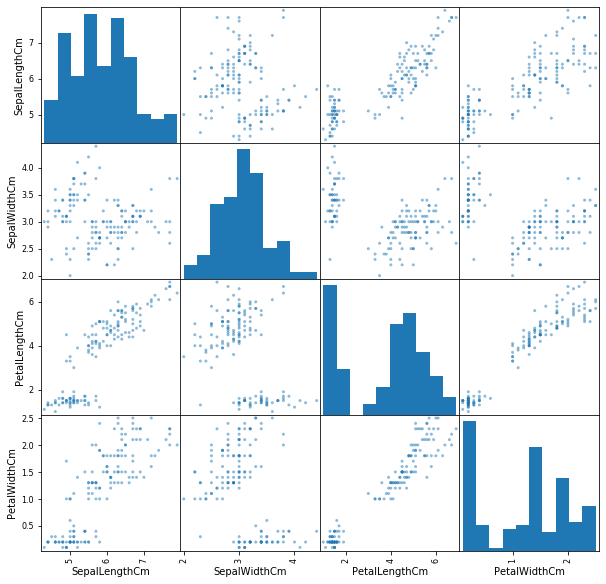

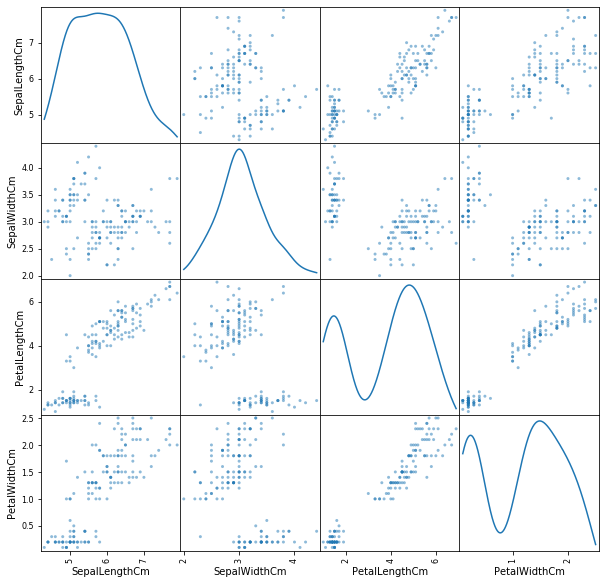

In [22]:
from pandas.plotting import scatter_matrix
# Pour afficher toute la matrice
scatter_matrix(df,figsize=(10,10))
plt.show()

# Pour afficher la matrice mais avec les densités plutôt que des histogrammes
scatter_matrix(df,figsize=(10,10), diagonal='kde')
plt.show()

## Utilisation de Seaborn 

Seaborn est une librairie plus récente développée au dessus de Maplotlib qui permet de pouvoir améliorer les visualisations. Une documentation complète est disponible : 
    https://seaborn.pydata.org.  
    Il faut importer la librairie seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 'Species']

df = pd.read_csv(url, names=names)
# 5 premières lignes du fichier
df.head()



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Affichage pour un attribut 

**Nombre de valeurs d'un attribut**

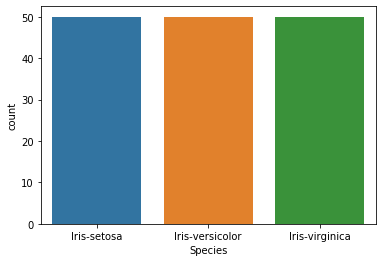

In [3]:
sns.countplot(x='Species', data=df)

**Histogramme**

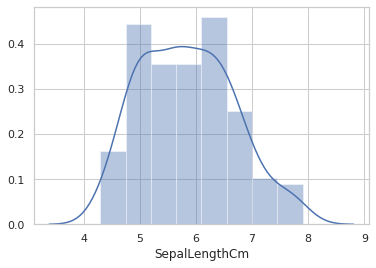

In [4]:
# Pour avoir un fond blanc avec grille
sns.set(style="whitegrid")
# Avec une ligne verticale pour montrer chaque observation dans une distribution
sns.distplot(df["SepalLengthCm"])


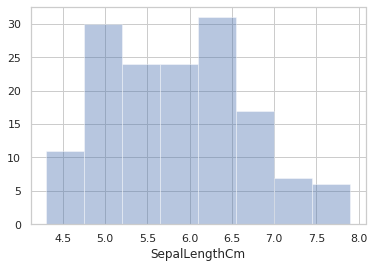

In [5]:
# Sans ligne verticale 
sns.distplot(df["SepalLengthCm"], kde=False)

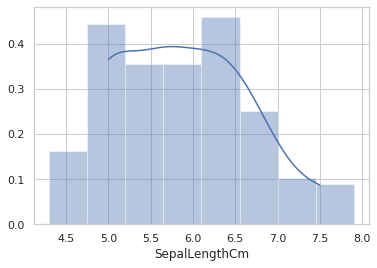

In [6]:
# En choissant uniquement une partie de la courbe 
sns.set(style="whitegrid")

ax=sns.distplot(df["SepalLengthCm"], 
                kde=True, kde_kws={'clip': (5, 7.5)})


plt.show()

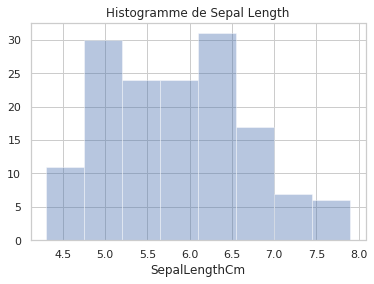

In [7]:
# Avec un titre 
# Pour avoir un fond blanc avec grille
sns.set(style="whitegrid")

ax=sns.distplot(df["SepalLengthCm"], kde=False)
ax.set_title("Histogramme de Sepal Length")

plt.show()

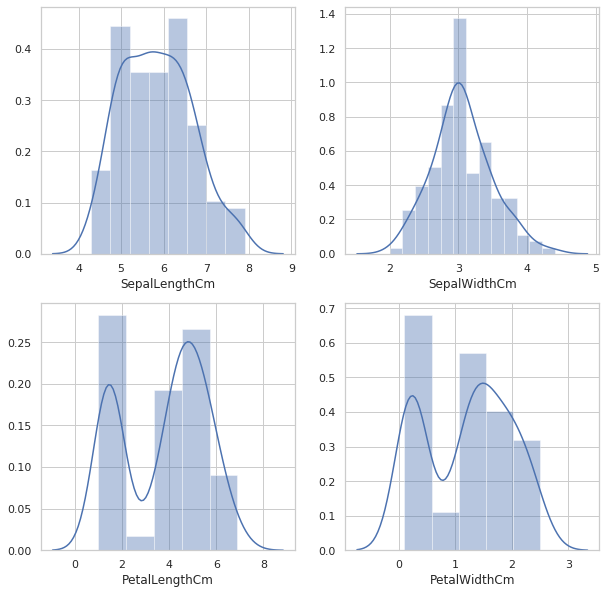

In [8]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
sns.distplot(df["SepalLengthCm"], ax=axes[0, 0])
sns.distplot(df["SepalWidthCm"], ax=axes[0, 1])
sns.distplot(df["PetalLengthCm"], ax=axes[1, 0])
sns.distplot(df["PetalWidthCm"], ax=axes[1, 1])

**Boîtes à moustache**  
Il existe différentes manières de représenter les boîtes à moustache en seaborn.

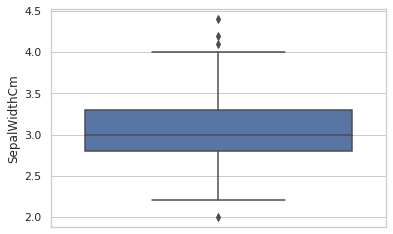

In [9]:
#sns.set(style="whitegrid")
# orient pour mettre la vue en vertical
ax = sns.boxplot(x=df["SepalWidthCm"], orient='v')


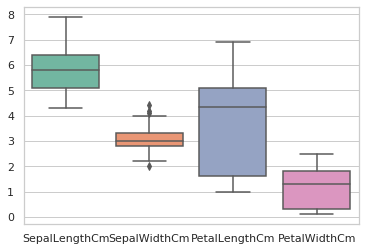

In [10]:
# palette = 'Set2' pour changer les couleurs
ax = sns.boxplot(data=df, palette='Set2')

Le mode violon est une combinaison de boîte à moustache et d'estimation de la densité. 

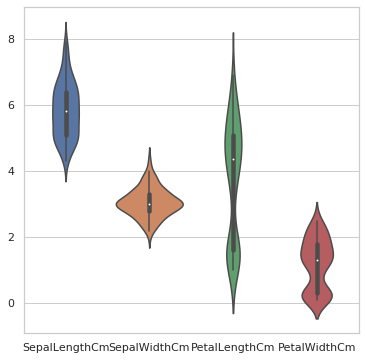

In [11]:
# changer la taille de la figure
fig, ax = plt.subplots(figsize=(6,6))
# Affichage en violon
ax=sns.violinplot(data=df)


Les swarmplot indiquent une bonne représentation de la distribution des données (elles sont toutes présentées sans chevauchement) mais sont difficile à interpréter lorsqu'il y a beaucoup de données.

In [ ]:
ax = sns.swarmplot(x=df["SepalLengthCm"])

Il est possible de connaître les boîtes à mouchoir par rapport à une variable catégorielle.


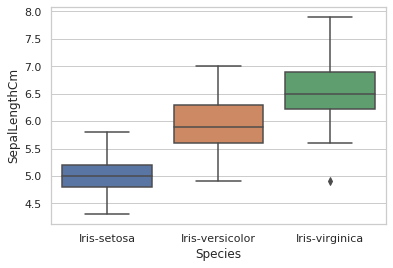

In [12]:
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=df)

### Travailler avec plusieurs attributs 

/home/karim/env/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


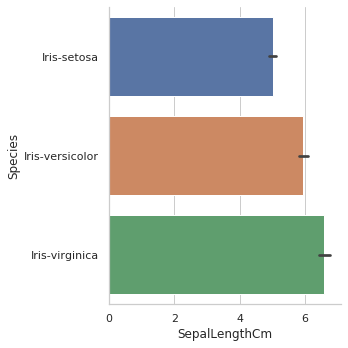

In [13]:
 sns.factorplot("SepalLengthCm",'Species', 
                data=df, kind="bar",  legend=False)
                   
# Show plot
plt.show()

In [14]:
corr = df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 0.98, "Correlation des attributs d'IRIS")

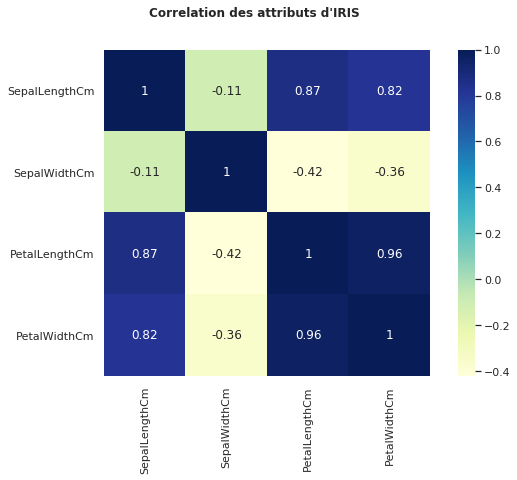

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes où afficher
                 cmap="YlGnBu", # Couleur
                 square=True,    # Si True, toutes les cellules ont le même aspect carré
                 annot=True      # Pour afficher les valeurs
                )

fig.suptitle("Correlation des attributs d'IRIS", 
              fontsize=12, 
              fontweight='bold')

**Scatter plot matrix**

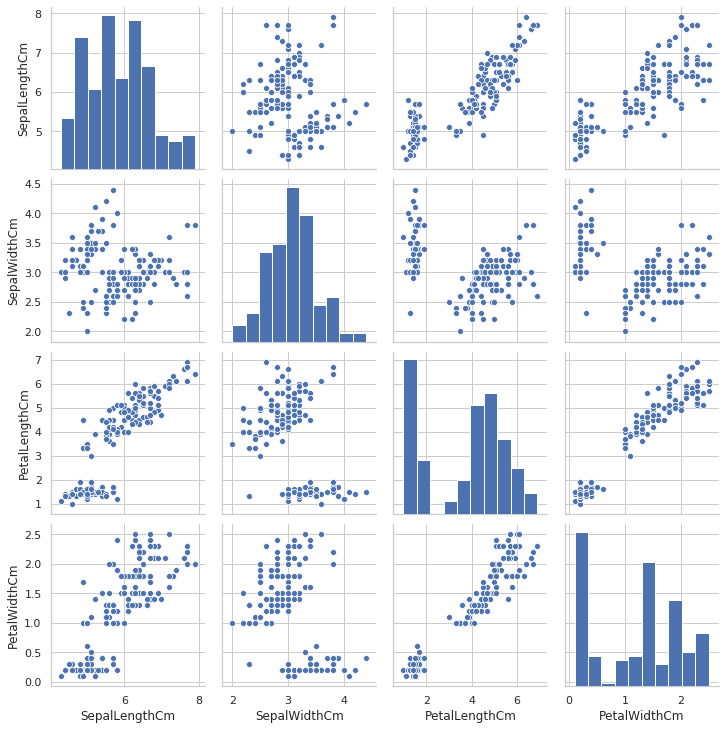

In [17]:


# Matrice de base
g = sns.pairplot(df)



Un exemple de variables fortements corrélées


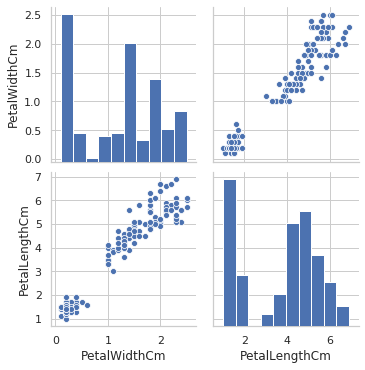

In [24]:
# Matrice réduite a un sous ensemble d'attributs
print ("Un exemple de variables fortements corrélées")
g = sns.pairplot(df, vars=["PetalWidthCm", 
                           "PetalLengthCm"])



In [19]:
# En mettant en avant les espèces
g = sns.pairplot(df,hue="Species")

Error in callback <function flush_figures at 0x7f66c7af51e0> (for post_execute):


KeyboardInterrupt: 

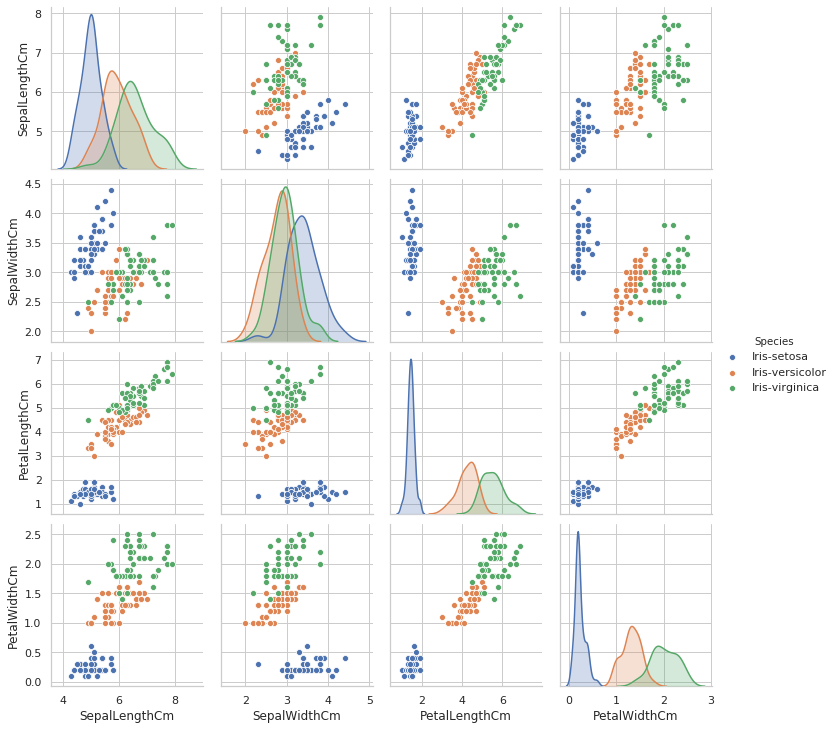

In [20]:
# En mettant en avant une estimation de la densité
g = sns.pairplot(df, hue="Species", diag_kind="kde")